In [53]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from scipy.linalg import null_space

np.random.seed(64432)

# Creating data

<IPython.core.display.Javascript object>


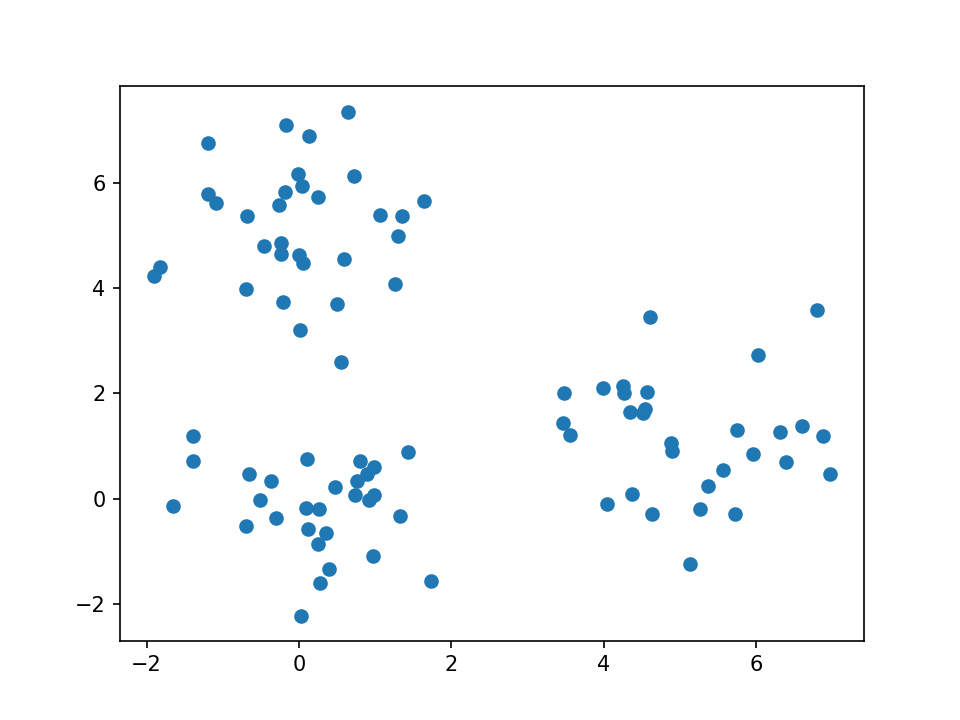

In [178]:
d = 2      # dimension of the ambient space
N = 30     # size of the data set
k = 3 
m = 6    # number of units

X1 = np.random.normal(0, 1, (N, d))
X2 = np.random.normal((5,1), 1, (N, d))
X3 = np.random.normal((0,5), 1, (N, d))

N = 3*N

X = np.concatenate((X1,X2,X3))

xs = X[:, 0]
ys = X[:, 1]

fig = plt.figure()
ax = fig.add_subplot()#projection='2d')
ax.scatter(xs, ys)


# Sample initial weight

In [19]:
weight_0 = np.random.random(d)
weight_0



array([0.59131654, 0.73419823])

<IPython.core.display.Javascript object>


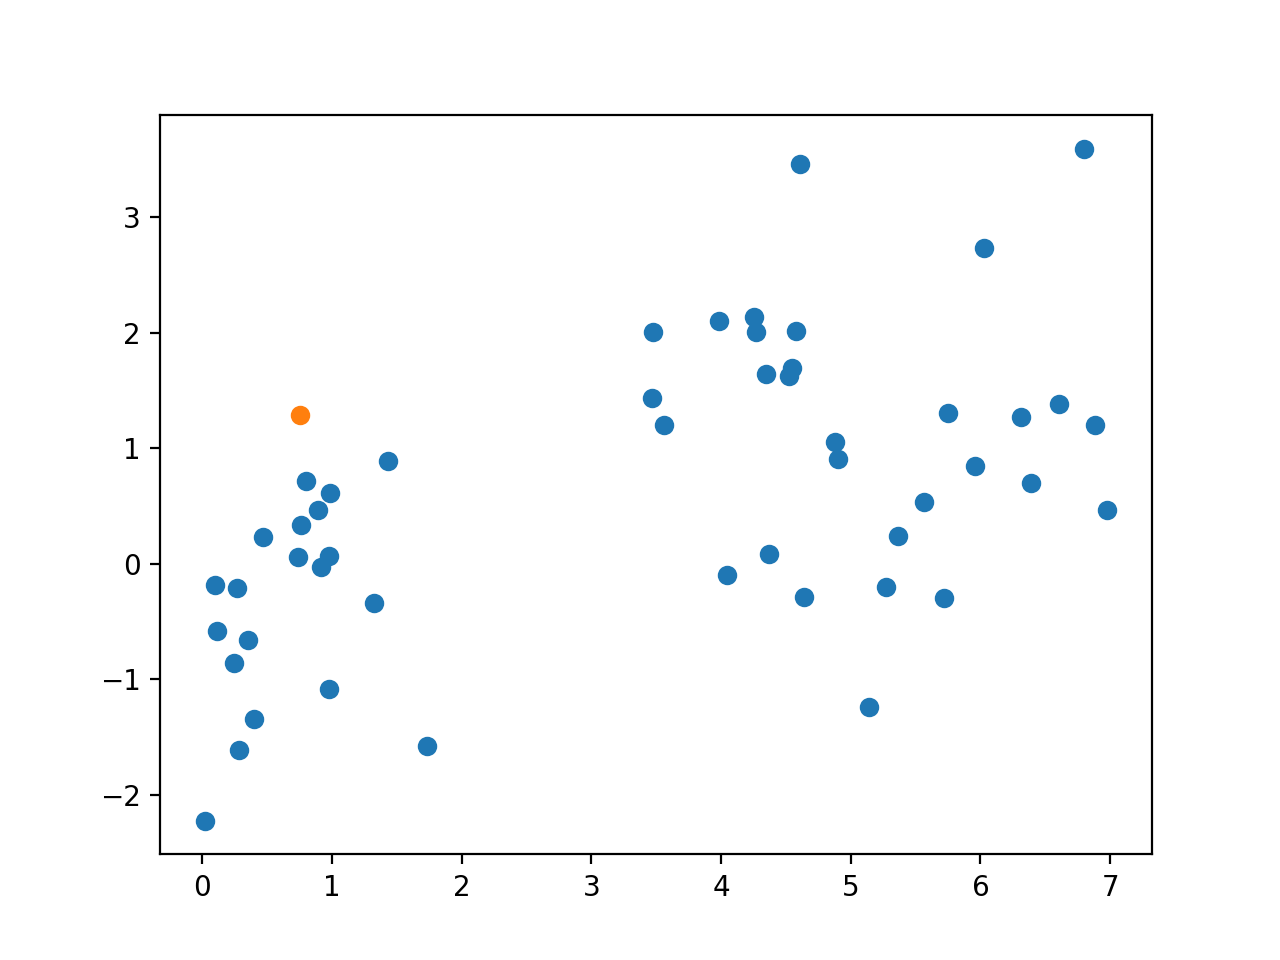

In [349]:
def median_point(Y):
    # Y is a N*d array of data
    
    d= Y.shape[1]
    point = []
    
    for n in range(d):
        point += [np.median(Y[:,n])]
        
    return np.array(point)

p = median_point(X)

fig = plt.figure()
ax = fig.add_subplot()#projection='2d')
ax.scatter(xs, ys)
ax.scatter(p[0],p[1])

In [72]:
def hyperplane_through_points(Y):
    # Y is a list (or array) of d points in R^d
    
    d = Y[0].shape[0]
    matrix = np.concatenate((y, np.ones((d,1))), axis = 1)
    
    return null_space(matrix).transpose()[0]
    

In [234]:
R = np.concatenate((np.zeros((N,m), dtype=int), np.arange(N).reshape(-1,1)), axis = 1)

R

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  0,  6],
       [ 0,  0,  0,  0,  0,  0,  7],
       [ 0,  0,  0,  0,  0,  0,  8],
       [ 0,  0,  0,  0,  0,  0,  9],
       [ 0,  0,  0,  0,  0,  0, 10],
       [ 0,  0,  0,  0,  0,  0, 11],
       [ 0,  0,  0,  0,  0,  0, 12],
       [ 0,  0,  0,  0,  0,  0, 13],
       [ 0,  0,  0,  0,  0,  0, 14],
       [ 0,  0,  0,  0,  0,  0, 15],
       [ 0,  0,  0,  0,  0,  0, 16],
       [ 0,  0,  0,  0,  0,  0, 17],
       [ 0,  0,  0,  0,  0,  0, 18],
       [ 0,  0,  0,  0,  0,  0, 19],
       [ 0,  0,  0,  0,  0,  0, 20],
       [ 0,  0,  0,  0,  0,  0, 21],
       [ 0,  0,  0,  0,  0,  0, 22],
       [ 0,  0,  0,  0,  0,  0, 23],
       [ 0,  0,  0,  0,  0,  0, 24],
       [ 0,  0,  0,  0,  0,  0, 25],
       [ 0,  0,  0,  0,  0,  0, 26],
 

In [235]:
def linear(weight, bias):
    def f(x):
        return np.dot(x,weight) + bias
    return f

def linear_list(weight, biases):
    l = []
    for bias in biases:
        l += [linear(weight, bias)]
    return l

def regions(X, functions):

    reg = []
    
    for x in X:
        vals = []
        for function in functions:
            vals += [function(x)]
        reg += [np.argmax(vals)]
    
    return reg

def update_region_array(R, regs, c):
    # R is the regions array
    # c is the column to be updated
    # regs is the new c^th column

    r = R.copy()

    r[:,c] = regs
    np.sort(r,0)

    
    return r[np.lexsort(np.rot90(r))]

In [239]:
type(R_[0][0])

numpy.int64

In [238]:
f1 = linear([1,0],0)
f2 = linear([0,1],0)
f3 = linear([0,0],0)

R_ = update_region_array(R, regions(X, [f1,f2,f3]), 2)

R_

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  0,  8],
       [ 0,  0,  0,  0,  0,  0,  9],
       [ 0,  0,  0,  0,  0,  0, 10],
       [ 0,  0,  0,  0,  0,  0, 13],
       [ 0,  0,  0,  0,  0,  0, 16],
       [ 0,  0,  0,  0,  0,  0, 17],
       [ 0,  0,  0,  0,  0,  0, 18],
       [ 0,  0,  0,  0,  0,  0, 19],
       [ 0,  0,  0,  0,  0,  0, 20],
       [ 0,  0,  0,  0,  0,  0, 21],
       [ 0,  0,  0,  0,  0,  0, 23],
       [ 0,  0,  0,  0,  0,  0, 24],
       [ 0,  0,  0,  0,  0,  0, 25],
       [ 0,  0,  0,  0,  0,  0, 26],
       [ 0,  0,  0,  0,  0,  0, 27],
       [ 0,  0,  0,  0,  0,  0, 29],
       [ 0,  0,  0,  0,  0,  0, 30],
       [ 0,  0,  0,  0,  0,  0, 31],
       [ 0,  0,  0,  0,  0,  0, 32],
       [ 0,  0,  0,  0,  0,  0, 33],
       [ 0,  0,  0,  0,  0,  0, 34],
       [ 0,  0,  0,  0,  0,  0, 35],
       [ 0,  0,  0,  0,  0,  0, 36],
 

In [337]:
def find_ordered_region_indices(R):
    # R is the reigons matrix

    region_groups = [[R[0,-1]]]
    region_sizes = [1]

    for n in range(1,N):
        if np.array_equal(R[n,:-1], R[n-1,:-1]):
            region_groups[-1] += [R[n,-1]]
            region_sizes[-1] += 1
        else:
            region_groups += [[R[n,-1]]]
            region_sizes += [1]
    
    sorted_region_indices = np.argsort(region_sizes)
    
    return [region_groups[i] for i in sorted_region_indices]

def top_d_median_points(ordered_indices, d, X):

    medians = []

    for i in range(1, d+1):
        indices = ordered_indices[-i]
        data = X[indices]
        medians += [median_point(data)]

    return medians

<IPython.core.display.Javascript object>


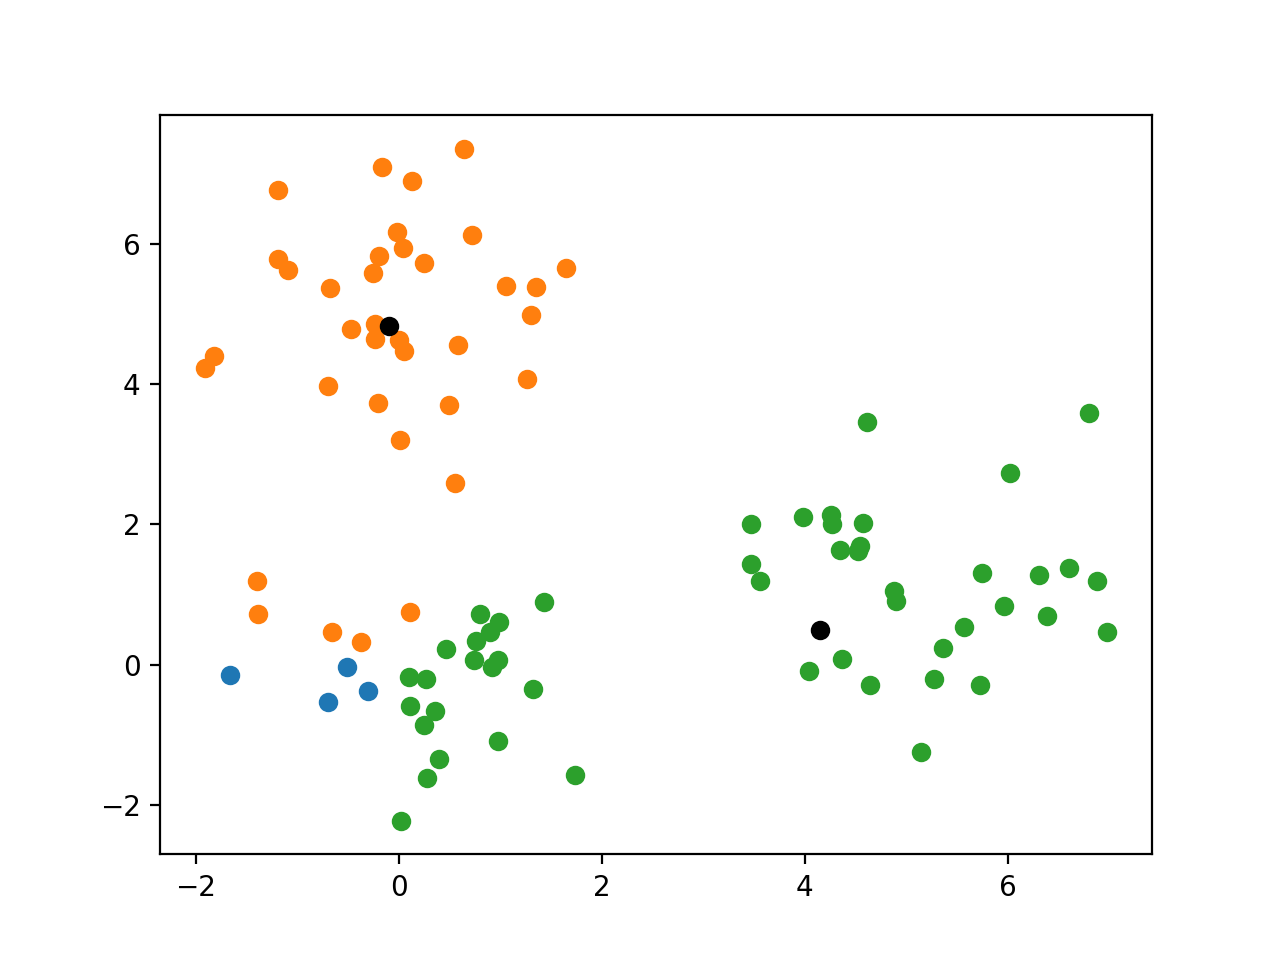

[array([4.14907845, 0.49985969]), array([-0.09137576,  4.82616517])]

In [350]:
top_d_median_points(find_ordered_region_indices(R_), d, X)

r = find_ordered_region_indices(R_)
meds = top_d_median_points(r, d, X)

fig = plt.figure()
ax = fig.add_subplot()#projection='2d')

for group in r:
    XX = X[group]
    xs = XX[:,0]
    ys = XX[:,1]
    ax.scatter(xs, ys)
    
for p in meds:
    ax.scatter(p[0],p[1], c = 'black')
    

meds

In [262]:
counter = np.zeros(shape = [k]*m)

#for row in R_:
    #print(row[:-1])

index = R_[0]

list(index)
#counter[0,0,0,0,0,0]
index = np.array([[0],[0],[0],[0],[0],[0]])
counter[index.transpose()]


array([[[[[[[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]]],


          [[[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]]],


          [[[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]]]],



         [[[[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],

           [[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]]],


          [[[0., 0., 0.],
    